# What relationships exist between our base datasets and a country being a BRI partner or not? 

Goal: identify if BRI country partnership has related factors

Datasets to evaluate: 
- financial expenditures at the country level 
- public opinion data at the country level 
- population 
- gdp 
- immigration records 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
#sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'BRI Partner Join Count over Time'),
 Text(0, 0.5, 'count of joining partners'),
 Text(0.5, 0, 'year')]

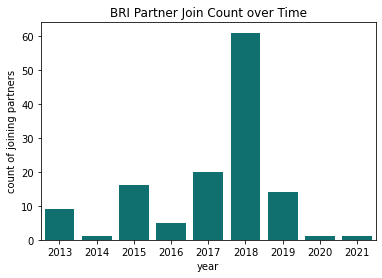

In [10]:
# get our base data, a listing of BRI partner countries 

countries = pd.read_csv("../data_final/countries.csv", dtype={'country_id':str})

countries.rename(columns={'bri_partner': 'bri_partner_year'}, inplace=True)
countries.replace({'unknown': float('nan')}, inplace=True)

countries['bri_partner'] = [1 if pd.notna(x) else 0 for x in countries['bri_partner_year']]

part = countries[['country', 'country_id', 'bri_partner_year', 'bri_partner']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.barplot(data=countries['bri_partner_year'].value_counts().reset_index().sort_values(
    by='index', ignore_index=True), x='index', y='bri_partner_year', color='teal', ax=ax1).set(
    title='BRI Partner Join Count over Time', ylabel='count of joining partners', xlabel='year')

## Financial Expenditure Data Exploration

In [18]:
# grab financial expenditure data, remove unneeded entities (ie multicountry expenditures and 0 $ expenditures)
expend = pd.read_csv("../data_final/AidData_v2.0.csv", dtype={'country_id':str}, index_col=0)
expend = expend.loc[pd.notna(expend['Amount (Constant USD2017)']) & pd.notna(expend['Commitment Year']) & (expend['country_id'] != 'Non') & pd.notna(expend['country_id'])].reset_index()
expend['country_id'] = [str(int(x.split('.')[0])) for x in expend['country_id']]

# split into data and labels
data = expend[['Commitment Year', 'Amount (Constant USD2017)']]
labels = expend['country_id'].reset_index()

labels_temp = labels.merge(countries, on='country_id', how='left')

assert len(labels_temp) == len(labels)

(0.0, 15000000000.0)

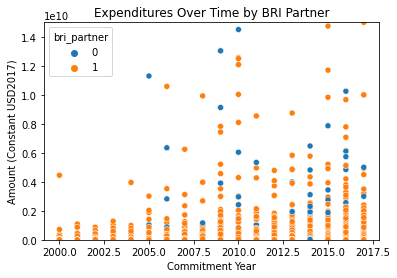

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Commitment Year', y='Amount (Constant USD2017)', 
                hue=labels_temp['bri_partner'], ax=ax).set(title='Expenditures Over Time by BRI Partner')
ax.set_ylim(0, 1.5e10)

Conclusion: BRI Project Expenditures increased in magnitude and quantity beginning in 2007.

Hypothesis: Non-BRI Partners recieved higher amounts of funding than non-partners. There might be a relation with country GDP (developed world). 

In [39]:
expend.groupby('Commitment Year')['Amount (Constant USD2017)'].sum().reset_index()

,Commitment Year,Amount (Constant USD2017)
0,2000,8.680486e+09
1,2001,1.211985e+10
2,2002,9.615767e+09
3,2003,1.125181e+10
4,2004,1.422379e+10
5,2005,3.777503e+10
6,2006,4.763153e+10
7,2007,1.209952e+11
8,2008,4.190275e+10
9,2009,1.598801e+11


<AxesSubplot:xlabel='Commitment Year', ylabel='Amount (Constant USD2017)'>

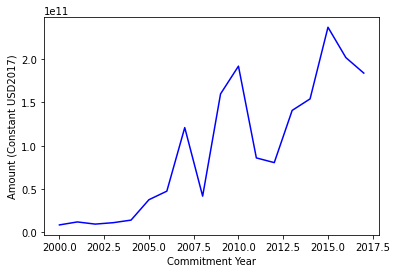

In [42]:
ax2 = ax1.twinx()
sns.lineplot(data=expend.groupby('Commitment Year')['Amount (Constant USD2017)'].sum().reset_index(), x= 'Commitment Year', y='Amount (Constant USD2017)', color='blue')

In [47]:
expend.groupby(['Recipient', 'Sector Name'])['Amount (Constant USD2017)'].sum().sort_values(ascending=False)[0:50]

Recipient     Sector Name                             
Venezuela     OTHER MULTISECTOR                           1.343970e+11
Russia        INDUSTRY, MINING, CONSTRUCTION              1.169412e+11
Indonesia     OTHER MULTISECTOR                           5.387881e+10
Brazil        INDUSTRY, MINING, CONSTRUCTION              3.899371e+10
Kazakhstan    INDUSTRY, MINING, CONSTRUCTION              3.838747e+10
Angola        OTHER MULTISECTOR                           3.817944e+10
Iran          OTHER MULTISECTOR                           3.602128e+10
Nigeria       ENERGY                                      3.541970e+10
Belarus       OTHER MULTISECTOR                           2.940338e+10
Pakistan      ENERGY                                      2.738163e+10
Angola        ENERGY                                      2.556193e+10
Kazakhstan    OTHER MULTISECTOR                           2.434027e+10
India         ENERGY                                      2.322620e+10
Guinea        OTHER MU

In [48]:
list(expend[(expend['Recipient'] == 'Russia') & (expend['Sector Name'] == 'INDUSTRY, MINING, CONSTRUCTION')]['Title'])

['CDB, ICBC, ABC, BoC participate in $500 million syndicated loan to Ilim Group for strategic development projects',
 'ICBC, BoC, CCB and Agricultural Bank of China contribute $307.7 million to $1 billion pre-export finance facility to Siberia Coal Energy Company (SUEK)',
 'CDB pledges $5 billion loan to Novatek for Arctic LNG 2 Project',
 'ICBC, Bank of China, and CCB provide RMB 4.8 billion syndicated revolving credit facility agreement to Norlisk Nickel to address the company’s medium-term liquidity needs',
 'Bank of China provides EUR 2 billion loan for Power of Siberia Gas Pipeline Project',
 'China Eximbank provides 4,472,500,000 RMB loan for Yamal Liquefied Natural Gas (LNG) Project (Linked to #67064, #67062, #67063, #67040)',
 'China Eximbank provides 4,279,700,000 EUR loan for Yamal Liquefied Natural Gas (LNG) Project (euro-denominated tranche) (Linked to #67064, #67063, #67041, #67040)',
 'CDB provides 5,286,000,000 RMB loan for Yamal Liquefied Natural Gas (LNG) Project (RMB-

In [42]:
expend['Title_Credit'] = [1 if "line of credit" in x else 0 for x in expend['Title']]

In [46]:
expend.groupby('Recipient')['Title_Credit'].sum().sort_values(ascending=False)[0:50]

Recipient
Iran                                7
Russia                              5
Brazil                              3
Zimbabwe                            2
Georgia                             2
Sudan                               1
Democratic Republic of the Congo    1
Myanmar                             1
Mozambique                          1
Morocco                             1
Turkmenistan                        1
Bolivia                             1
Belarus                             1
Ukraine                             1
Uzbekistan                          1
Argentina                           1
Palestinian Territory               0
Panama                              0
Papua New Guinea                    0
Paraguay                            0
Palau                               0
Peru                                0
Pakistan                            0
Oman                                0
North Macedonia                     0
Philippines                         0
No